# Titanic Dataset: EDA to Explore/Visualize
## Task 1

In [1]:
import pandas as pd
import numpy as mp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Loading data into a dataframe

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

### checking the data types in each Columns

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Checking for missing values


In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Found missing values in columns Age, Cabin, Embarked. Cabin column has more missing values which can not be replaced, so we are going to drop it

In [7]:
data = data.drop(["Cabin"], axis = 1)


#### Finding the most commom Embarked value and replacing the missing value with it

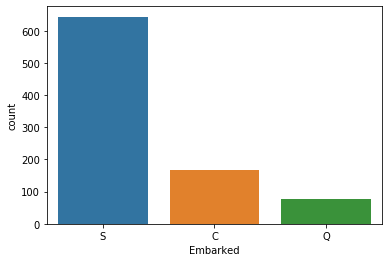

In [8]:
sns.countplot(x = "Embarked", data = data)

In [9]:
data["Embarked"] = data["Embarked"].fillna(value = "S")
data["Embarked"].isnull().sum()

0

#### Replacing the missing values in Age coloum with the mean of that column

In [10]:
data["Age"] = data["Age"].fillna(value=data["Age"].mean())
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### Changing the data types as required

In [11]:
data['Sex']=data['Sex'].astype('category')
data['Age']=data['Age'].astype('int')
data['Embarked']=data['Embarked'].astype('category')
data['Survived']=data['Survived'].astype('category')
data['Pclass']=data['Pclass'].astype('category')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C


#### Ploating graphs to know more about the data

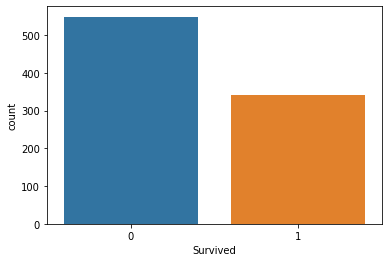

In [12]:
sns.countplot(x="Survived", data = data)

In [13]:
percentage_survived = (data["Survived"].value_counts()/891)*100
percentage_survived

0    61.616162
1    38.383838
Name: Survived, dtype: float64

#### Found that 61% of people have not survived

male      64.758698
female    35.241302
Name: Sex, dtype: float64

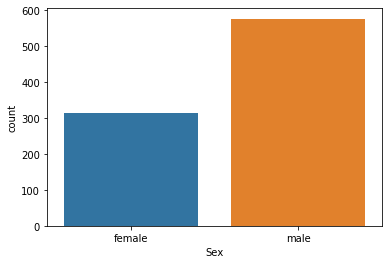

In [14]:
sns.countplot(x="Sex", data = data)
(data["Sex"].value_counts()/891)*100

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64

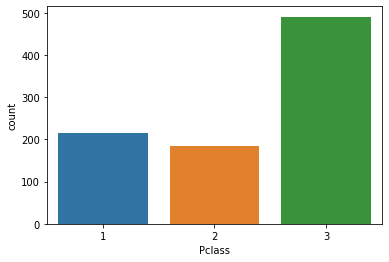

In [15]:
sns.countplot(x="Pclass", data = data)
(data["Pclass"].value_counts()/891)*100

#### Most people are from Pclass 3

0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: SibSp, dtype: float64

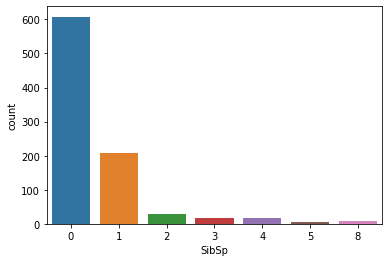

In [16]:
sns.countplot(x=data["SibSp"], data = data)
((data["SibSp"]).value_counts()/891)*100

#### Nearly 68% of the people traved did not travel with either siblings nor spouse

0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64

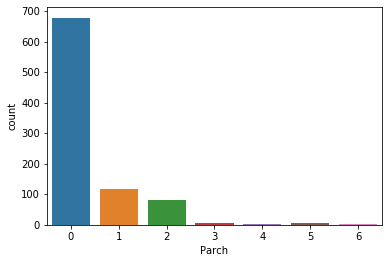

In [17]:
sns.countplot(x=data["Parch"], data = data)
((data["Parch"]).value_counts()/891)*100

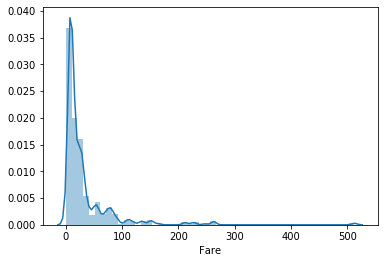

In [18]:
sns.distplot(data["Fare"])

### Fare data does not follows normal distribution
#### More people traveled in less fare 


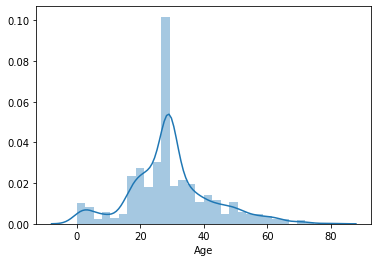

In [19]:
sns.distplot(data["Age"])

#### Age data nearly follows normal distribution

In [20]:
data.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


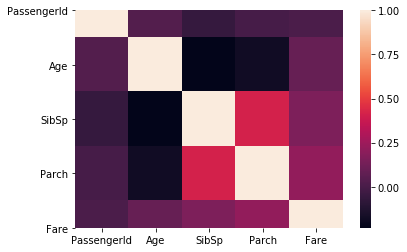

In [21]:
sns.heatmap(data.corr())

#### There is more correlation between Parch and Sibsp so can be combained into one feature

In [22]:
data["Family"] = data["Parch"] + data["SibSp"]

In [23]:
data = data.drop(["Parch", "SibSp", "Ticket"], axis =1)


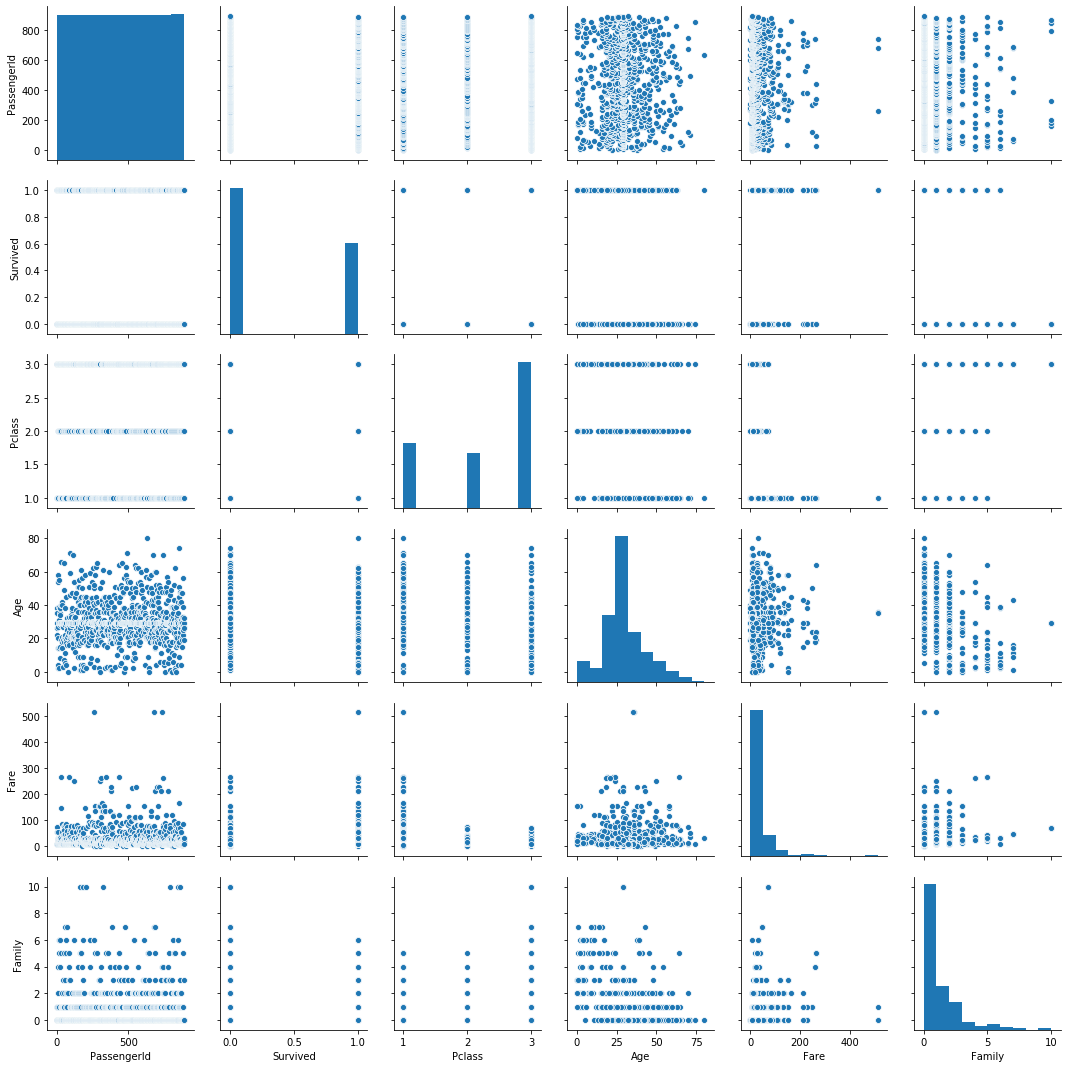

In [24]:
sns.pairplot(data)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null category
Pclass         891 non-null category
Name           891 non-null object
Sex            891 non-null category
Age            891 non-null int32
Fare           891 non-null float64
Embarked       891 non-null category
Family         891 non-null int64
dtypes: category(4), float64(1), int32(1), int64(2), object(1)
memory usage: 35.3+ KB


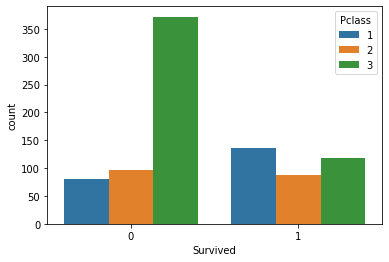

In [26]:
sns.countplot(x = "Survived", hue = "Pclass", data = data)

#### People travelling in Pclass 1 survived the most and Pclass 3 people where lest to be survived

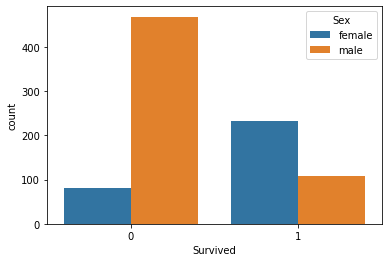

In [27]:
sns.countplot(x = "Survived", hue = "Sex", data = data)

#### Female passengers survived the most

S    646
C    168
Q     77
Name: Embarked, dtype: int64

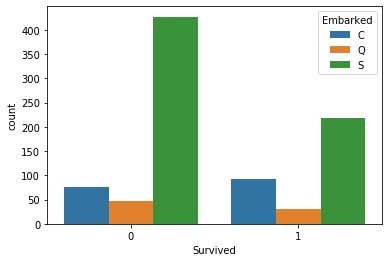

In [28]:
sns.countplot(x = "Survived", hue = "Embarked", data = data)
data["Embarked"].value_counts()

#### People embarked on s survived more

In [29]:
percentage_Embarked = (data["Embarked"].value_counts()/891)*100
percentage_Embarked

S    72.502806
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64

### Outliners detection and removal

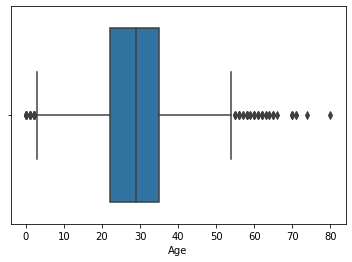

In [30]:
sns.boxplot(data["Age"])


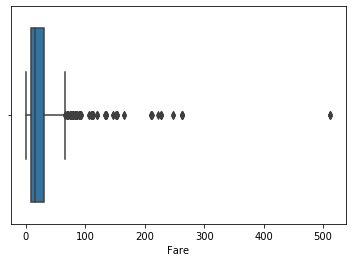

In [31]:
sns.boxplot(data["Fare"])

In [32]:
data = data[data['Age']<(data['Age'].mean() + 3 * data['Age'].std())]


In [33]:
import numpy as np
Q1 = np.percentile(data["Fare"], 25)   
Q3 = np.percentile(data["Fare"], 75) 
IQR = Q3 - Q1 
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR
data = data[(data["Fare"]>lower) & (data["Fare"]<upper)]

In [34]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22,7.2500,S,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35,8.0500,S,0
5,6,0,3,"Moran, Mr. James",male,29,8.4583,Q,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,30.0000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,23.4500,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26,30.0000,C,0


In [35]:
data = data.drop(["Name"], axis = 1)

In [36]:
data.sample(4)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family
4,5,0,3,male,35,8.0500,S,0
485,486,0,3,female,29,25.4667,S,4
756,757,0,3,male,28,7.7958,S,0
813,814,0,3,female,6,31.2750,S,6


### One hot encoding of categorial data

In [37]:
data = pd.get_dummies(data = data, columns=['Pclass','Sex','Embarked'], drop_first=True)

In [38]:
data

,PassengerId,Survived,Age,Fare,Family,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,1,0,22,7.2500,1,0,1,1,0,1
2,3,1,26,7.9250,0,0,1,0,0,1
3,4,1,35,53.1000,1,0,0,0,0,1
4,5,0,35,8.0500,0,0,1,1,0,1
5,6,0,29,8.4583,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,27,13.0000,0,1,0,1,0,1
887,888,1,19,30.0000,0,0,0,0,0,1
888,889,0,29,23.4500,3,0,1,0,0,1
889,890,1,26,30.0000,0,0,0,1,0,0


### implementing SVM on the dataset

In [39]:
X = data.drop('Survived',axis=1)

In [40]:
Y = data['Survived']

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=101)

In [42]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [43]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7965367965367965
